

<table width = "100%">
  <tr style="background-color:white;">
    <td style="text-align:right;vertical-align:bottom;font-size:12px;"> 
        Prepared by  <a href="https://www.linkedin.com/in/victor-brauer-quantum/" target="_blank"> Víctor H. T. Brauer </a> (México)</td>
    </tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
 </table>
 
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

 ---

<h1>STP Code</h1>




the picked angle is 28.8 degrees and 2.5132741228718345 radians
a= -0.809 b= 0.5878


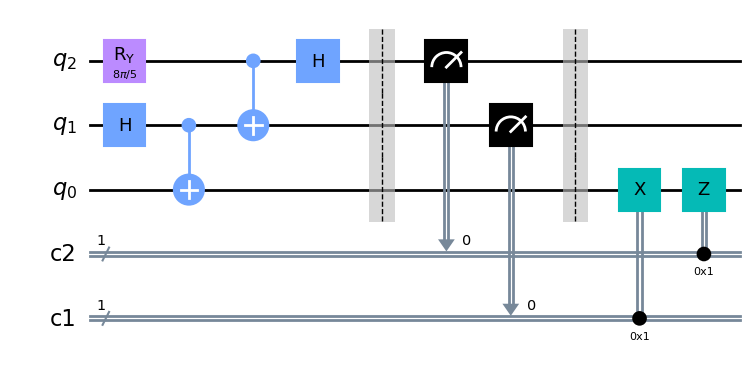

the state vector is
[-0.        +0.00000000e+00j -0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        -0.00000000e+00j
 -0.80901699+0.00000000e+00j  0.58778525-7.19829328e-17j
 -0.        +0.00000000e+00j  0.        -0.00000000e+00j]
-0.0
-0.0
0.0
0.0
-0.809
0.5878
-0.0
0.0
the classical outcome is 10


In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi, cos, sin
from random import randrange

# quantum circuit with three qubits and two bits
q =  QuantumRegister(3,"q") 
c1 = ClassicalRegister(1,"c1") 
c2 = ClassicalRegister(1,"c2") 
qc = QuantumCircuit(q,c1,c2)

# rotate the first qubit by random angle
r = randrange(10)
theta = pi*(r/10) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")
a = cos(theta)
b = sin(theta)
print("a=",round(a,4),"b=",round(b,4))
#This is gonna prepare the initial state into 
qc.ry(2*theta,q[2])

# Creating a Bell state with qubits q[1] and q[0] that is our resource state
qc.h(q[1])
qc.cx(q[1],q[0])



#Creating entanglement for the Bell measure between Alice qubits
# CNOT operator by Asja on her qubits where q[2] is the control qubit 
qc.cx(q[2],q[1])
# Hadamard operator by Asja on q[2]
qc.h(q[2])


qc.barrier()


# the measurement done by Asja
qc.measure(q[2],c2)
qc.measure(q[1],c1)

qc.barrier()

# post-processing done by Balvis
qc.x(q[0]).c_if(c1,1)
qc.z(q[0]).c_if(c2,1)

# draw the circuit
display(qc.draw(output='mpl',reverse_bits=True))

# read the state vector
job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
current_quantum_state=job.result().get_statevector(qc).data
print("the state vector is")
print(current_quantum_state)

for i in range(len(current_quantum_state)):
    print(round(current_quantum_state[i].real,4))
#print()

classical_outcomes = ['00','01','10','11']

for i in range(4):
    if (current_quantum_state[2*i].real != 0) or (current_quantum_state[2*i+1].real != 0):
        print("the classical outcome is",classical_outcomes[i])